# Install and Import Dependencies

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio
import gdown
import tempfile
import shutil

from keras.models import Sequential
from keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

! pip install -q Levenshtein
! python -q -m spacy download en_core_web_trf

from sklearn.metrics import accuracy_score
from scipy import spatial
import en_core_web_sm
import Levenshtein
import nltk
import dlib
from datetime import datetime

from skimage import exposure



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.4 MB/s eta 0:00:00
2023-07-21 08:16:46.986964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


# Build Data Loading Functions

In [2]:
selected_speakers = [1,2,3]

In [3]:
#change
# Download speaker 1 data from drive
! gdown 1aTA8ZhsRgMZl9R8RfznomuXYxVkgCyz_
! gdown 1h8gmAbmnOKBvzRKypyoGofjKHYAo8jSB
# Download speaker 2 data from drive
! gdown 17N-eJZRRcfdBSvMu1dN4NtLT9TMIOyzx
! gdown 1cpcxt0fC_aDeBP_b7p5uopfkZ-Tf_bJF
# Download speaker 3 data from drive
! gdown 1p4Sz_0wpVplejcLZpOuzdX3hcqHxz67i
! gdown 1Lav2IrypyYPkk5eRXiE4g2ODX53kF1Tk

Downloading...
From: https://drive.google.com/uc?id=1aTA8ZhsRgMZl9R8RfznomuXYxVkgCyz_
To: /content/s1.zip
100% 423M/423M [00:09<00:00, 42.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h8gmAbmnOKBvzRKypyoGofjKHYAo8jSB
To: /content/s1.tar
100% 1.03M/1.03M [00:00<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=17N-eJZRRcfdBSvMu1dN4NtLT9TMIOyzx
To: /content/s2.tar
100% 1.03M/1.03M [00:00<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cpcxt0fC_aDeBP_b7p5uopfkZ-Tf_bJF
To: /content/s3.tar
100% 1.03M/1.03M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p4Sz_0wpVplejcLZpOuzdX3hcqHxz67i
To: /content/s2.zip
100% 394M/394M [00:11<00:00, 34.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Lav2IrypyYPkk5eRXiE4g2ODX53kF1Tk
To: /content/s3.zip
100% 393M/393M [00:12<00:00, 30.4MB/s]


In [4]:
#change
# extract speaker 1 data
! mkdir align-s1 align-s2 align-s3
! mkdir data data/alignments data/videos
! tar -xf s1.tar -C align-s1
! tar -xf s2.tar -C align-s2
! tar -xf s3.tar -C align-s3
! mv align-s1/* data/alignments/s1
! mv align-s2/* data/alignments/s2
! mv align-s3/* data/alignments/s3
! rm -rf align-s1
! rm -rf align-s2
! rm -rf align-s3
! unzip s1.zip -d data/videos/
! unzip s2.zip -d data/videos/
! unzip s3.zip -d data/videos/

Archive:  s1.zip
   creating: data/videos/s1/
  inflating: data/videos/s1/swio1s.mpg  
  inflating: data/videos/s1/prii9a.mpg  
  inflating: data/videos/s1/sgwp9s.mpg  
  inflating: data/videos/s1/lwws5s.mpg  
  inflating: data/videos/s1/bbal8p.mpg  
  inflating: data/videos/s1/pwwrzp.mpg  
  inflating: data/videos/s1/pwwezn.mpg  
  inflating: data/videos/s1/sgivzn.mpg  
  inflating: data/videos/s1/swwi9s.mpg  
  inflating: data/videos/s1/lgwtzn.mpg  
  inflating: data/videos/s1/sgii2n.mpg  
  inflating: data/videos/s1/lwwm3a.mpg  
  inflating: data/videos/s1/pbio4n.mpg  
  inflating: data/videos/s1/pbbc5s.mpg  
  inflating: data/videos/s1/sgap2p.mpg  
  inflating: data/videos/s1/brwt5s.mpg  
  inflating: data/videos/s1/bbbz8n.mpg  
  inflating: data/videos/s1/pwip7s.mpg  
  inflating: data/videos/s1/lwazzn.mpg  
  inflating: data/videos/s1/bgwo5a.mpg  
  inflating: data/videos/s1/pbbp5a.mpg  
  inflating: data/videos/s1/prap5s.mpg  
  inflating: data/videos/s1/bwat5a.mpg  
  inflating

In [5]:
#change
# Define folders
cache_dir = '/content/data'
alignment_dir = f'{cache_dir}/alignments'
videos_dir = f'{cache_dir}/videos'

In [6]:
# invalid_speakers = [21]
# base_dataset_URL = 'https://spandh.dcs.shef.ac.uk/gridcorpus'

# get_videos_url = lambda speaker_index : f'{base_dataset_URL}/s{speaker_index}/video/s{speaker_index}.mpg_vcd.zip'
# get_alignments_url = lambda speaker_index : f'{base_dataset_URL}/s{speaker_index}/align/s{speaker_index}.tar'

# cache_dir = '/content/data'
# alignment_dir = f'{cache_dir}/alignments'
# videos_dir = f'{cache_dir}/videos'

# speakers = [speaker for speaker in range(1, 36) if speaker in selected_speakers and speaker not in invalid_speakers]

# if not (os.path.isdir(alignment_dir) or os.path.isdir(videos_dir)):
#   with tempfile.TemporaryDirectory() as tmpdir:
#     for speaker_index in speakers:
#       print(f'Downloading speaker {speaker_index}:')

#       alignments_path = f'alignments/s{speaker_index}'
#       tf.keras.utils.get_file(None, get_alignments_url(speaker_index), extract=True,
#                                       cache_dir=tmpdir, cache_subdir = alignments_path)
#       shutil.move(f'{tmpdir}/{alignments_path}/align', f'{alignment_dir}/s{speaker_index}')

#       tf.keras.utils.get_file(None, get_videos_url(speaker_index), extract=True,
#                                       cache_dir=tmpdir, cache_subdir = 'videos')
#       shutil.move(f'{tmpdir}/videos/s{speaker_index}', f'{videos_dir}/s{speaker_index}')

In [7]:
 #change
!gdown 1OjyocXqGSoNB0HS_PhAE4j2G5YVpwBky
!gdown 1POhU6luyH-WD14QuOUU4pLOIYDOoe16n
mouth_cascade = cv2.CascadeClassifier('./haarcascade_mcs_mouth.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

if face_cascade.empty():
  raise IOError('Unable to load the face cascade classifier xml file')
if mouth_cascade.empty():
  raise IOError('Unable to load the mouth cascade classifier xml file')

Downloading...
From: https://drive.google.com/uc?id=1OjyocXqGSoNB0HS_PhAE4j2G5YVpwBky
To: /content/haarcascade_mcs_mouth.xml
100% 742k/742k [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1POhU6luyH-WD14QuOUU4pLOIYDOoe16n
To: /content/haarcascade_frontalface_default.xml
100% 1.29M/1.29M [00:00<00:00, 148MB/s]


In [8]:
 #change

bad_videos = []
def crop_mouth_from_face_in_frame(video, frame):
  face_detected = True
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  face_rects = face_cascade.detectMultiScale(gray, 1.2, 5)
  if len(face_rects) == 0:
    face_detected = False
    bad_videos.append(video)
    frame_resize = cv2.resize(frame, (140,140))
    mouth = frame_resize[90:120,40:100]
    mouth_resize = cv2.resize(mouth, (120,100))
  else:
    for (x,y,w,h) in face_rects:
        frame = frame[y:y+h,x:x+w]
        frame_resize = cv2.resize(frame, (140,140))
        mouth = frame_resize[90:140,40:100]
        mouth_resize = cv2.resize(mouth, (120,100))
        break


  return mouth_resize

In [9]:
def load_video(path: str) -> List[float]:
      cap = cv2.VideoCapture(path)
      #change
      frames_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      # Preprocessing
      frames = []
      #change
      for _ in range(frames_count):
          ret, frame = cap.read()
          #change
          frame = crop_mouth_from_face_in_frame(path,frame)
          frame = tf.image.rgb_to_grayscale(frame)
          frames.append(frame)

      cap.release()

      mean = tf.math.reduce_mean(frames)
      std = tf.math.reduce_std(tf.cast(frames, tf.float32))

      return tf.cast((frames - mean), tf.float32) / std

In [10]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")

num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
char_to_num(['h','a','b','a', 'n', 'i'])

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 8,  1,  2,  1, 14,  9])>

In [14]:
num_to_char([8, 1, 2, 1, 14, 9])

<tf.Tensor: shape=(6,), dtype=string, numpy=array([b'h', b'a', b'b', b'a', b'n', b'i'], dtype=object)>

In [15]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [16]:
def load_data(video_path: str):
    video_path = bytes.decode(video_path.numpy())
    alignment_path = video_path.replace("videos","alignments").replace("mpg","align")
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [17]:
test_path = './data/videos/s1/bbaf2n.mpg'

**`tensors_to_strings`** - A function which converts tensors to a string

In [18]:
def tensors_to_strings(tensor_list):
    string_list = []
    for tensor in tensor_list:
        # Convert tensor to string using K.eval()
        string_value = tf.keras.backend.eval(tensor).decode('utf-8')  # Assuming UTF-8 encoding
        string_list.append(string_value)

    return string_list

**`nlp_accuracy`** - A function which calculates the accuracy using nlp

In [19]:
def nlp_accuracy(y_true_string, y_pred_string):
  nlp = en_core_web_sm.load()
  result = 0

  for true, pred in zip(y_true_string, y_pred_string):
    true_doc, pred_doc = nlp(true).vector, nlp(pred).vector
    result += (1 - spatial.distance.cosine(true_doc, pred_doc))

  avg_accuracy = result / len(y_true_string)
  return avg_accuracy

**`levenstein_accuracy`** - A function which calculates and prints the accuracy using Levenstein

In [20]:
def levenstein_accuracy(y_true_string, y_pred_string):
  similarity = 0

  for true, pred in zip(y_true_string, y_pred_string):
    distance = Levenshtein.distance(true, pred)
    max_length = max(len(true), len(pred))
    similarity += (1 - (distance / max_length))
    threshold = 0.8

  avg_accuracy = similarity / len(y_true_string)
  return avg_accuracy

*Wer and Cer accuracy*

**`calculate_wer`** - A function which calculates the wer accuracy for a single sentence

**`calculate_cer`** - A function which calculates the cer accuracy for a single sentence

**`wer_and_cer_accuracy`** - A function which calculates the average wer Cer accuracy

In [21]:
def calculate_wer(reference, hypothesis):
    reference_tokens = reference.lower().split()
    hypothesis_tokens = hypothesis.lower().split()

    distance = nltk.edit_distance(reference_tokens, hypothesis_tokens)
    wer = distance / len(reference_tokens)
    return wer

def calculate_cer(reference, hypothesis):
    reference_chars = list(reference.lower())
    hypothesis_chars = list(hypothesis.lower())

    distance = nltk.edit_distance(reference_chars, hypothesis_chars)
    cer = distance / len(reference_chars)
    return cer

def wer_and_cer_accuracy(y_true_string, y_pred_string):
  wer_score, cer_score = 0, 0
  for true, pred in zip(y_true_string, y_pred_string):
    wer_score += calculate_wer(true, pred)
    cer_score += calculate_cer(true, pred)

  avg_wer = wer_score / len(y_true_string)
  avg_cer = cer_score / len(y_true_string)

  return avg_wer, avg_cer

alignments-

In [22]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

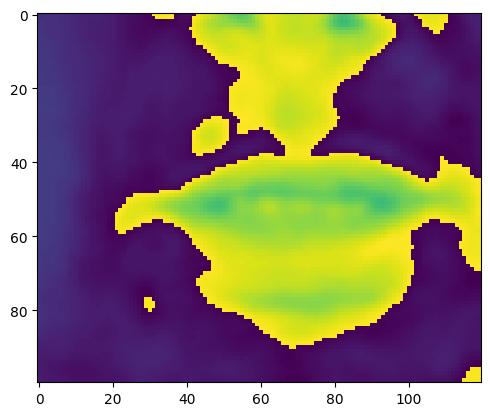

In [23]:
plt.imshow(frames[19])

In [24]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39,  6, 39, 20, 23, 15,
       39, 14, 15, 23])>

In [25]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>

In [26]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [27]:
batch_size = 32
train_percentage = 0.5

data = tf.data.Dataset.list_files('./data/videos/*/*.mpg')
data_count = len(data)
preprocessed_data = data.shuffle(data_count, reshuffle_each_iteration=False).map(mappable_function).prefetch(tf.data.AUTOTUNE)

train_count = int(train_percentage * data_count)

# Added for split
# Batch size is 2 hard coded, bigger batch sizes caused problems
train = preprocessed_data.take(train_count).padded_batch(2, padded_shapes=([75,None,None,None],[40]))
test = preprocessed_data.skip(train_count).padded_batch(2, padded_shapes=([75,None,None,None],[40]))

In [28]:
print('train', len(train), 'test', len(test))

train 750 test 750


In [29]:
batch = train.as_numpy_iterator().next()

In [30]:
batched_videos, batched_alignments = batch

In [31]:
sample_video = batched_videos[0]
sample_alignments = batched_alignments[0]

In [32]:
imageio.mimsave('./animation.gif', sample_video, fps=10)

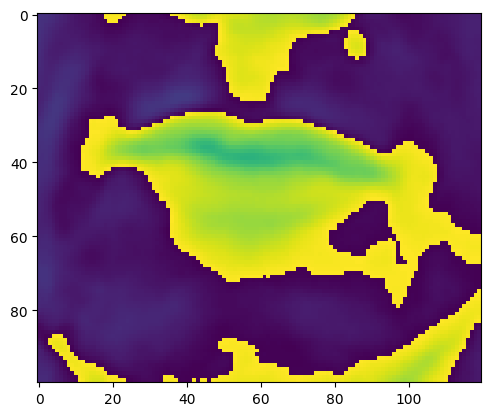

In [33]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(sample_video[35])

In [34]:
tf.strings.reduce_join([num_to_char(word) for word in sample_alignments])

<tf.Tensor: shape=(), dtype=string, numpy=b'place white with y zero now'>

# 3. Design the Deep Neural Network

In [35]:
input_shape = sample_video.shape
input_shape

(75, 100, 120, 1)

In [36]:
def create_model():
  model = Sequential()
  # Three layers of 3D/spatiotemporal convolutions.
  model.add(Conv3D(128, 3, input_shape=input_shape, padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPool3D((1,2,2)))

  model.add(Conv3D(256, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPool3D((1,2,2)))

  model.add(Conv3D(75, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPool3D((1,2,2)))

  # Flattens each time slice independently.
  model.add(TimeDistributed(Flatten()))

  # Two layers of Bi-LSTM's.
  # return_sequences=True makes the the network output a sequence of predictions, one for each time step of the input sequence.
  model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
  model.add(Dropout(.5))

  model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
  model.add(Dropout(.5))

  # Linear transformation (dense layer) and output (softmax layer).
  model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))
  return model

In [37]:
model_example = create_model()
model_example.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 100, 120, 128  3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 100, 120, 128  0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 50, 60, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 50, 60, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 50, 60, 256)   0         
                                                        

In [38]:
yhat = model_example.predict(np.expand_dims(sample_video, axis=0))[0]

1/1 [==============================] - 6s 6s/step


In [39]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat,axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'9992222222222222222222yyyyyyyyyyyyy22222222222222222222222222222qqqqqqqqyy3'>

In [40]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat])

<tf.Tensor: shape=(), dtype=string, numpy=b'9992222222222222222222yyyyyyyyyyyyy22222222222222222222222222222qqqqqqqqyy3'>

In [41]:
model_example.input_shape

(None, 75, 100, 120, 1)

In [42]:
model_example.output_shape

(None, 75, 41)

## Define Loss Function

**CTC (Connectionist Temporal Classification)** is a commonly used technique in automatic speech recognition and other sequence-to-sequence tasks where the alignment between the input sequence and the target sequence is not one-to-one.

The `ctc_batch_cost` refers to the loss function and it calculates the CTC loss for a batch of input-output sequence pairs.

In [43]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

## Choose Parameters

### Optimizer

In [44]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

### Scheduler

We chose the ReduceLROnPlateau scheduler from this list for the base model because tensoflow has a built-in implementation for it unlike CosineAnnealingLR for example.
But I think it is a good idea to play with these options when running the experiments



1. **StepLR:** This scheduler reduces the learning rate by a factor gamma at specified milestones or epochs. It is commonly used when you want to decrease the learning rate at specific intervals during training.

2. **ReduceLROnPlateau:** This scheduler reduces the learning rate when a monitored metric (such as validation loss) has stopped improving. It is useful when you want to dynamically adjust the learning rate based on the model's performance.

3. **CosineAnnealingLR:** This scheduler uses a cosine annealing schedule to gradually reduce the learning rate. It is effective in scenarios where you want to gradually decrease the learning rate over a specified number of epochs.

4. **CyclicLR:** This scheduler cycles the learning rate between specified minimum and maximum values. It can help the model escape from poor local optima and explore different areas of the loss landscape.




In [45]:
onPlateau_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Which metric to monitor (e.g., validation loss)
    factor=0.1,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Verbosity mode (0 = silent, 1 = update messages)
    min_delta=1e-4,      # Minimum change in monitored metric to qualify as an improvement
    cooldown=0,          # Number of epochs to wait after reducing learning rate before resuming normal operation
    min_lr=0             # Lower bound on the learning rate
)

In [46]:
def step_decay(epoch, epochs_drop = 10):
    initial_lr = 0.0001
    drop = 0.5       # factor by which the learning rate will be reduced
    lr = initial_lr * drop ** (epoch // epochs_drop)
    return lr

In [47]:
onEpoch_scheduler = LearningRateScheduler(lambda epoch: step_decay(epoch, epochs_drop=2))

## Define Callbacks

In [48]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=False)

## Compile the Model

In [49]:
model_example.compile(optimizer=optimizer, loss=CTCLoss)

# Experiments and Training

## First Experiment

The base model without any schedulers

### Choose Parameters

In [ ]:
epochs = 6

### Training

In [ ]:
first_model = create_model()
first_model.compile(optimizer=optimizer, loss=CTCLoss)

In [ ]:
first_model.fit(train, validation_data=test, epochs=epochs, callbacks=[checkpoint_callback])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 80.8787

750/750 [==============================] - 3435s 5s/step - loss: 80.8787 - val_loss: 68.7491
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 69.5789

750/750 [==============================] - 3443s 5s/step - loss: 69.5789 - val_loss: 64.1829
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 65.4016

750/750 [==============================] - 3451s 5s/step - loss: 65.4016 - val_loss: 60.7515
Epoch 4/6
750/750 [==============================] - ETA: 0s - loss: 62.3617

750/750 [==============================] - 3430s 5s/step - loss: 62.3617 - val_loss: 58.1798
Epoch 5/6
750/750 [==============================] - ETA: 0s - loss: 58.8246

750/750 [==============================] - 3406s 5s/step - loss: 58.8246 - val_loss: 53.6075
Epoch 6/6
750/750 [==============================] - ETA: 0s - loss: 55.3968

750/750 [==============================] - 3416s 5s/step - loss: 55.3968 - val_loss: 50.8289


### Plot Predictions and Metrics

Make a single prediction

In [ ]:
test_data = test.as_numpy_iterator()
first_sample = test_data.next()

In [ ]:
print('~'*100, 'REAL TEXT')
first_y_true = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in first_sample[1]]

In [ ]:
first_yhat = first_model.predict(first_sample[0])
first_yhat_decoded = tf.keras.backend.ctc_decode(first_yhat, input_length=[75,75], greedy=True)[0][0].numpy()

1/1 [==============================] - 2s 2s/step


In [ ]:
print('~'*100, 'PREDICTIONS')
first_y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in first_yhat_decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


Convert the tensors to string for the accuracy calculations

In [ ]:
first_y_true_string = tensors_to_strings(first_y_true)
first_y_pred_string = tensors_to_strings(first_y_pred)

In [ ]:
print(first_y_true_string)
print(first_y_pred_string)

['place blue by j zero please', 'set white by v one soon']
['la re e a', 'la ree e  o']


Accuracy using nlp

In [ ]:
print(nlp_accuracy(first_y_true_string, first_y_pred_string))

0.3546842485666275


Accuracy using Levenstein

In [ ]:
print(levenstein_accuracy(first_y_true_string, first_y_pred_string))

0.2785829307568438


Accuracy using wer and cer

In [ ]:
wer, cer = wer_and_cer_accuracy(first_y_true_string, first_y_pred_string)
print("WER: ", wer)
print("CER: ", cer)

WER:  1.0
CER:  0.7214170692431562


## Second Experiment

Base model but with "on-epoch" scheduler to the same number of epochs

### Choose Parameters

In [ ]:
epochs = 6

In [ ]:
schedule_callback = onEpoch_scheduler

### Training

In [ ]:
second_model = create_model()
second_model.compile(optimizer=optimizer, loss=CTCLoss)

In [ ]:
second_model.fit(train, validation_data=test, epochs=epochs, callbacks=[checkpoint_callback, schedule_callback])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 80.8820

750/750 [==============================] - 3429s 5s/step - loss: 80.8820 - val_loss: 67.6311 - lr: 1.0000e-04
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 68.5348

750/750 [==============================] - 3458s 5s/step - loss: 68.5348 - val_loss: 63.1090 - lr: 1.0000e-04
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 65.0263

750/750 [==============================] - 3409s 5s/step - loss: 65.0263 - val_loss: 61.1859 - lr: 5.0000e-05
Epoch 4/6
750/750 [==============================] - ETA: 0s - loss: 63.1260

750/750 [==============================] - 3419s 5s/step - loss: 63.1260 - val_loss: 59.1074 - lr: 5.0000e-05
Epoch 5/6
750/750 [==============================] - ETA: 0s - loss: 61.6172

750/750 [==============================] - 3416s 5s/step - loss: 61.6172 - val_loss: 57.7169 - lr: 2.5000e-05
Epoch 6/6
750/750 [==============================] - ETA: 0s - loss: 60.4967

750/750 [==============================] - 3432s 5s/step - loss: 60.4967 - val_loss: 56.5376 - lr: 2.5000e-05


### Plot Predictions and Metrics

Make a single prediction

In [ ]:
test_data = test.as_numpy_iterator()
second_sample = test_data.next()

In [ ]:
print('~'*100, 'REAL TEXT')
second_y_true = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in second_sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


In [ ]:
second_yhat = second_model.predict(second_sample[0])
second_yhat_decoded = tf.keras.backend.ctc_decode(second_yhat, input_length=[75,75], greedy=True)[0][0].numpy()

1/1 [==============================] - 2s 2s/step


In [ ]:
print('~'*100, 'PREDICTIONS')
second_y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in second_yhat_decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


Convert the tensors to string for the accuracy calculations

In [ ]:
second_y_true_string = tensors_to_strings(second_y_true)
second_y_pred_string = tensors_to_strings(second_y_pred)
print(second_y_true_string)
print(second_y_pred_string)

['set green by p nine again', 'bin white by t eight please']
['la ree a o', 'laa ree o e']


Accuracy using nlp

In [ ]:
print(nlp_accuracy(second_y_true_string, second_y_pred_string))

0.3607921153306961


Accuracy using Levenstein

In [ ]:
print(levenstein_accuracy(second_y_true_string, second_y_pred_string))

0.22332015810276679


Accuracy using wer and cer

In [ ]:
wer, cer = wer_and_cer_accuracy(second_y_true_string, second_y_pred_string)
print("WER: " + wer)
print("CER: " + cer)

WER: 1.0
CER: 0.7764419012324353


## Third Experiment

Base model but with "on-plateau" scheduler to the same number of epochs

### Choose Parameters

In [ ]:
epochs = 6

In [ ]:
schedule_callback = onPlateau_scheduler

### Training

In [ ]:
third_model = create_model()
third_model.compile(optimizer=optimizer, loss=CTCLoss)

In [ ]:
third_model.fit(train, validation_data=test, epochs=epochs, callbacks=[checkpoint_callback, schedule_callback])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 83.6205

750/750 [==============================] - 3418s 5s/step - loss: 83.6205 - val_loss: 70.7989 - lr: 1.0000e-04
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 72.1816

750/750 [==============================] - 3408s 5s/step - loss: 72.1816 - val_loss: 67.5371 - lr: 1.0000e-04
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 69.2799

750/750 [==============================] - 3407s 5s/step - loss: 69.2799 - val_loss: 64.7684 - lr: 1.0000e-04
Epoch 4/6
750/750 [==============================] - ETA: 0s - loss: 66.7382

750/750 [==============================] - 3414s 5s/step - loss: 66.7382 - val_loss: 62.3896 - lr: 1.0000e-04
Epoch 5/6
750/750 [==============================] - ETA: 0s - loss: 64.6785

750/750 [==============================] - 3418s 5s/step - loss: 64.6785 - val_loss: 60.5756 - lr: 1.0000e-04
Epoch 6/6
750/750 [==============================] - ETA: 0s - loss: 62.8693

750/750 [==============================] - 3413s 5s/step - loss: 62.8693 - val_loss: 59.1064 - lr: 1.0000e-04


### Plot Predictions and Metrics

Make a single prediction

In [ ]:
test_data = test.as_numpy_iterator()
third_sample = test_data.next()

In [ ]:
print('~'*100, 'REAL TEXT')
third_y_true = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in third_sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


In [ ]:
third_yhat = third_model.predict(third_sample[0])
third_yhat_decoded = tf.keras.backend.ctc_decode(third_yhat, input_length=[75,75], greedy=True)[0][0].numpy()

1/1 [==============================] - 2s 2s/step


In [ ]:
print('~'*100, 'PREDICTIONS')
third_y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in third_yhat_decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


Convert the tensors to string for the accuracy calculations

In [ ]:
third_y_true_string = tensors_to_strings(third_y_true)
third_y_pred_string = tensors_to_strings(third_y_pred)
print(third_y_true_string)
print(third_y_pred_string)

['set red in g nine soon', 'bin blue with s nine again']
['la re an', 'la re an']


Accuracy using nlp

In [ ]:
print(nlp_accuracy(third_y_true_string, third_y_pred_string))

0.2785440981388092


Accuracy using Levenstein

In [ ]:
print(levenstein_accuracy(third_y_true_string, third_y_pred_string))

0.229020979020979


Accuracy using wer and cer

In [ ]:
wer, cer = wer_and_cer_accuracy(third_y_true_string, third_y_pred_string)
print("WER: " + str(wer))
print("CER: " + str(cer))

WER: 1.0
CER: 0.770979020979021


## Fourth Experiment

The model with "on-plateau" scheduler to the same number of epochs, but starting with a higher learning rate

### Choose Parameters

In [50]:
epochs = 6

In [51]:
schedule_callback = onPlateau_scheduler

In [52]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

### Training

In [56]:
fourth_model = create_model()
fourth_model.compile(optimizer=optimizer, loss=CTCLoss)

In [57]:
fourth_model.fit(train, validation_data=test, epochs=epochs, callbacks=[checkpoint_callback, schedule_callback])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 76.5045

750/750 [==============================] - 3421s 5s/step - loss: 76.5045 - val_loss: 77.9836 - lr: 0.0010
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 66.5543

750/750 [==============================] - 3400s 5s/step - loss: 66.5543 - val_loss: 60.5346 - lr: 0.0010
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 59.2440

750/750 [==============================] - 3393s 5s/step - loss: 59.2440 - val_loss: 52.4328 - lr: 0.0010
Epoch 4/6
750/750 [==============================] - ETA: 0s - loss: 51.6285

750/750 [==============================] - 3396s 5s/step - loss: 51.6285 - val_loss: 46.4546 - lr: 0.0010
Epoch 5/6
750/750 [==============================] - ETA: 0s - loss: 47.8677

750/750 [==============================] - 3395s 5s/step - loss: 47.8677 - val_loss: 45.3829 - lr: 0.0010
Epoch 6/6
750/750 [==============================] - ETA: 0s - loss: 45.6968

750/750 [==============================] - 3409s 5s/step - loss: 45.6968 - val_loss: 41.5368 - lr: 0.0010


### Plot Predictions and Metrics

Make a single prediction

In [58]:
test_data = test.as_numpy_iterator()
fourth_sample = test_data.next()

In [59]:
print('~'*100, 'REAL TEXT')
fourth_y_true = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in fourth_sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


In [60]:
fourth_yhat = fourth_model.predict(fourth_sample[0])
fourth_yhat_decoded = tf.keras.backend.ctc_decode(fourth_yhat, input_length=[75,75], greedy=True)[0][0].numpy()

1/1 [==============================] - 2s 2s/step


In [61]:
print('~'*100, 'PREDICTIONS')
fourth_y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in fourth_yhat_decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


Convert the tensors to string for the accuracy calculations

In [62]:
fourth_y_true_string = tensors_to_strings(fourth_y_true)
fourth_y_pred_string = tensors_to_strings(fourth_y_pred)
print(fourth_y_true_string)
print(fourth_y_pred_string)

['place blue with j two soon', 'bin blue by f six soon']
['pac wree it ive oo', 'pac wree it ive oo']


Accuracy using nlp

In [63]:
print(nlp_accuracy(fourth_y_true_string, fourth_y_pred_string))

0.24777496606111526


Accuracy using Levenstein

In [64]:
print(levenstein_accuracy(fourth_y_true_string, fourth_y_pred_string))

0.3898601398601399


Accuracy using wer and cer

In [65]:
wer, cer = wer_and_cer_accuracy(fourth_y_true_string, fourth_y_pred_string)
print("WER: " + str(wer))
print("CER: " + str(cer))

WER: 1.0
CER: 0.6101398601398601


# Final Model

After all of our experiments we chose to use the model from the third experiment, which was our best model.
In Our experiments we discovered that "on-plateau" scheduler was the best schedular and that using higher learning rate makes the model get very fast to local maximum and because of that the learning process doesn't really learn effieciely at all.
Now, that we know that this paramenters gets us the best results, we can train it for a much more epochs in order to get it to good results.

### Choose Parameters

In [ ]:
epochs = 40

In [ ]:
schedule_callback = onPlateau_scheduler

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

### Training

In [ ]:
final_model = create_model()
final_model.compile(optimizer=optimizer, loss=CTCLoss)
final_model.fit(train, validation_data=test, epochs=epochs, callbacks=[checkpoint_callback, schedule_callback])

2023-07-09 16:41:24.873416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 16:41:24.873957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 16:41:24.874812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2023-07-09 16:41:25.548000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-09 16:41:25.548996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-09 16:41:25.549583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 46/750 [>.............................] - ETA: 9:14 - loss: 21.6837

### Plot Predictions and Metrics

Make a single prediction

In [ ]:
test_data = test.as_numpy_iterator()
final_sample = test_data.next()

In [ ]:
print('~'*100, 'REAL TEXT')
final_y_true = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in final_sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


In [ ]:
final_yhat = final_model.predict(final_sample[0])
final_yhat_decoded = tf.keras.backend.ctc_decode(final_yhat, input_length=[75,75], greedy=True)[0][0].numpy()

1/1 [==============================] - 3s 3s/step


In [ ]:
print('~'*100, 'PREDICTIONS')
final_y_pred = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in final_yhat_decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


Convert the tensors to string for the accuracy calculations

In [ ]:
final_y_true_string = tensors_to_strings(final_y_true)
final_y_pred_string = tensors_to_strings(final_y_pred)
print(final_y_true_string)
print(final_y_pred_string)

['lay white in e three now', 'bin red by g zero now']
['lay white it g thre now', 'bin red by z zero now']


Accuracy using nlp

In [ ]:
print(nlp_accuracy(final_y_true_string, final_y_pred_string))

0.8337835371494293


Accuracy using Levenstein

In [ ]:
print(levenstein_accuracy(final_y_true_string, final_y_pred_string))

0.9136904761904762


Accuracy using wer and cer

In [ ]:
wer, cer = wer_and_cer_accuracy(final_y_true_string, final_y_pred_string)
print("WER: " + str(wer))
print("CER: " + str(cer))

WER: 0.3333333333333333
CER: 0.08630952380952381


# Save the Best Model

In [ ]:
saved_model = final_model

In [ ]:
saved_model.save('model_40e.h5')